## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  **Punti 2**
  
   **Totale: Punti 11**


In [102]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

Matrice A di dimensioni 300x300
matrice sparsa
matrice simmetrica
matrice definita positiva


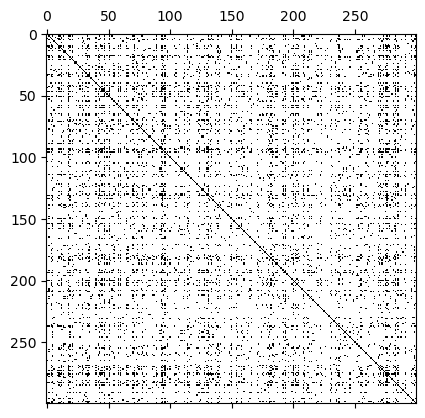

In [103]:
# metodi di discesa applicabili se matrice quadrata, di grande dimensioni, sparsa, simmetrica e def pos
m, n = A.shape
print(f'Matrice A di dimensioni {m}x{n}')
if np.all(np.count_nonzero(A) * 100 / (m*n)) < 33:
    print(f'matrice sparsa')
else: print ('matrice densa')
if np.all(A == A.T): 
    print('matrice simmetrica')
    if np.all(npl.eigvals(A) > 0):
        print('matrice definita positiva')

plt.spy(A)

Poiché la matrice è simmetrica e definita positiva, i metodi di discesa sono applicabili.

In [104]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]

    x = x0
    r = A@x-b
    p = -r  
    it = 0
    nb = np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)

    while errore >= tol and it< itmax:
        it=it+1
        Ap = A @ p       
        alpha = - (r.T @ p) / (p.T @ Ap)    
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)

    while errore >= tol and it< itmax:
        it=it+1
        Ap = A @ p
        alpha = - (r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma = (r.T @ r) / rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = r + gamma * p
       
    return x,vet_r,vec_sol,it


In [105]:
x0 = np.array([0] * n).T
tol = 1e-6 
itmax = 2000

x_conj,vet_r_conj,vec_sol_conj,it_conj = conjugate_gradient(A, b, x0, itmax, tol)
x_st, vet_r_st, vec_sol_st, it_st = steepestdescent(A, b, x0, itmax, tol)
print(f'Soluzione con conjugate gradient = {x_conj} in {it_conj} iterazioni')
print(f'Soluzione con steepest descent {x_st} in {it_st} iterazioni')

Soluzione con conjugate gradient = [[ 7.20927289e+36  7.20927289e+36  7.20927289e+36 ...  4.15036969e+18
   4.15036969e+18 -8.20333487e+52]
 [-8.36099718e+35 -8.36099718e+35 -8.36099718e+35 ... -1.46492351e+18
  -1.46492351e+18  7.24604884e+52]
 [-4.84794358e+36 -4.84794358e+36 -4.84794358e+36 ... -4.41877808e+17
  -4.41877808e+17  1.12647678e+52]
 ...
 [-1.57107291e+19 -1.57107291e+19 -1.57107291e+19 ... -2.82651649e+16
  -2.82651649e+16  3.22344348e+31]
 [ 9.14949035e+18  9.14949035e+18  9.14949035e+18 ...  1.66286817e+16
   1.66286817e+16 -1.61936534e+31]
 [ 4.94426154e+52  4.94426154e+52  4.94426154e+52 ... -3.20702701e+31
  -3.20702701e+31 -1.37565785e+69]] in 2000 iterazioni
Soluzione con steepest descent [[0.99928979 0.99928979 0.99928979 ... 0.99928979 0.99928979 0.99928979]
 [1.01964087 1.01964087 1.01964087 ... 1.01964087 1.01964087 1.01964087]
 [0.29211244 0.29211244 0.29211244 ... 0.29211244 0.29211244 0.29211244]
 ...
 [0.26795523 0.26795523 0.26795523 ... 0.26795523 0.267

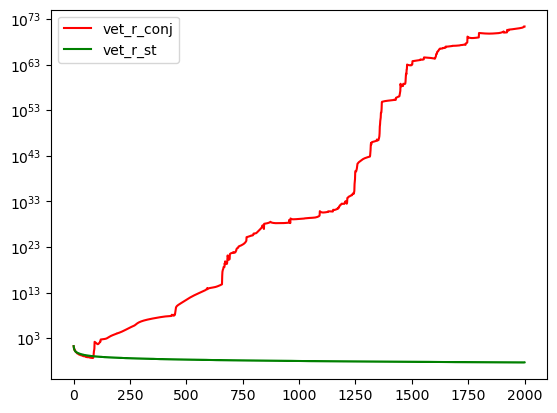

In [106]:
plt.semilogy(vet_r_conj, '-r', vet_r_st, '-g')
plt.legend(['vet_r_conj', 'vet_r_st'])
plt.show()

In [107]:
if npl.cond(A) < 100: 
    print("Matrice ben condizionata")
elif npl.cond(A) > 10**4: 
    print("Matrice altamente mal condizionata")

Matrice altamente mal condizionata


Matrice mal condizionata => la velocità dei due metodi è pressoché la stessa. 
Ciò non vale nel caso di matrici ben condizionate: in questa situazione, il metodo del gradiente coniugato converge più velocemente alla soluzione.
 

In [108]:
# Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi
# sulla diagonali tutti uguali a 0.05, e termine noto b1,
# costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.
#  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. 
# Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati 
A1 = A + 0.05 * np.eye(m)
x1 = np.ones(m)
b1 = A1 @ x1
# x,vet_r,vec_sol,it

x1_st, r1_st, sol1_st, it1_st = steepestdescent(A1, b1, x0, itmax, tol)
x1_conj, r1_conj, sol1_conj, it1_conj = conjugate_gradient(A1, b1, x0, itmax, tol)
print(f'soluzione A1 x1 = b1 con Steepest descent = {x1_st} in {it1_st} iterazioni')
print(f'\nsoluzione A1 x1 = b1 con Conjugate Gradient = {x1_conj} in {it1_conj} iterazioni')

soluzione A1 x1 = b1 con Steepest descent = [1.00000245 1.00000032 0.99999276 1.         0.99999954 0.99999923
 0.99999481 1.         0.99999816 0.99999828 1.0000003  0.99999329
 1.00000082 0.99999876 0.99999772 0.99999644 0.99999692 1.
 0.99999628 0.99999949 1.         0.99999861 1.00000014 0.99999669
 0.99999687 0.99999999 0.99999967 1.00000039 1.         0.99999991
 0.99999997 1.         0.99999872 1.00000033 0.99999557 0.99999471
 1.00000081 0.9999918  1.         1.00000074 0.99999695 1.
 0.99999709 0.99999779 1.00000011 0.99999536 0.99999944 1.00000167
 1.         0.999996   1.00000004 0.99999679 1.         1.00000061
 0.99999531 0.99999396 1.00000001 1.00000005 0.9999973  1.
 0.99999818 1.         0.99999942 0.99999675 1.         0.9999992
 1.00000088 1.         0.99999951 1.         0.99999999 0.99999698
 1.         0.99999805 0.99999977 0.99999812 1.         0.99999479
 1.0000007  0.99999945 1.00000158 0.99999774 0.99999751 0.99999969
 1.0000015  1.         0.99999434 0.9999993

In [109]:
if npl.cond(A1) < 100: 
    print('A1 ben condizionata')

A1 ben condizionata


La matrice A1 è ben condizionata. Infatti, il metodo del gradiente coniugato converge alla soluzione esatta in un numero molto minore di iterazioni rispetto a Steepest Descent.

# Esercizio 2

Siano assegnati i vettori
$$
x = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] , $$
$$
y = [1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59] 
$$

contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

1. Si determini il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati sviluppando  le functions necessarie; **Punti: 4**

In [110]:
import SolveTriangular

In [111]:
x = np.array( [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] )
y = np.array( [1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59] )

xx = np.linspace(1.0, 3.0, 200)

In [112]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G = A.T @ A     
    f = A.T @ b   
    L = npl.cholesky(G) 
    U = L.T   
    z, flag = SolveTriangular.Lsolve(L, f)
    x, flag = SolveTriangular.Usolve(U, z)    
    return x

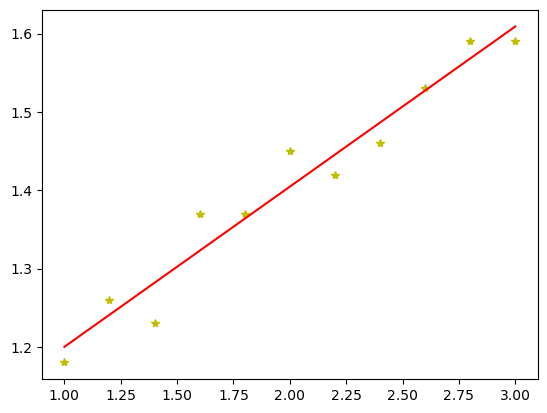

In [113]:
A = np.vander(x, 2, increasing=True)
alpha = eqnorm(A, y)
pol = np.polyval(np.flip(alpha), xx)
plt.plot(x, y, 'y*', xx, pol, 'r-')

2. Si determini il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie;  **Punti: 4**

In [114]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
        xzeri=np.append(xnodi[0:j], xnodi[j+1:n])
        
    num = np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     
     for j in range(n):
        p = plagr(x, j)
        L[:,j] = np.polyval(p, xx)    
    
     return L@y

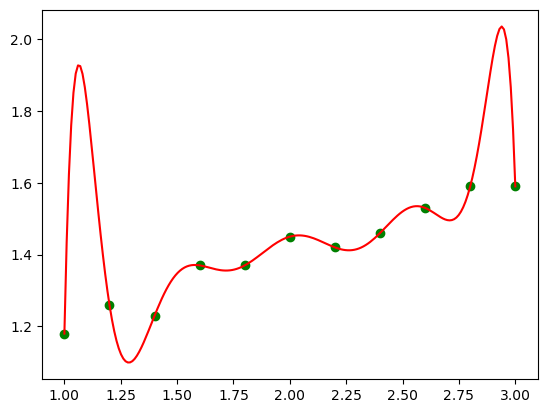

In [115]:
pol_interpl = InterpL(x, y, xx)
plt.plot(x, y, 'go', xx, pol_interpl, 'r-')

3. Si consideri il set di dati ($x_i,\hat{y}_i$) , dove $\hat{y}_i = 0.2 x_i+1$, $i = 0, ..., 10$ e si ricalcolino il polinomio di approssimazione ai minimi quadrati di grado 1 e il polinomio di interpolazione a partire dai nuovi punti $(x_i, \hat{y}_i)$, i = 0, ..., 10; **Punti: 1**

In [116]:
y_cappello = [0.2*xi+1 for xi in x]

alpha = eqnorm(A, y_cappello)
pol_quadr = np.polyval(np.flip(alpha), xx)
pol_int = InterpL(x, y_cappello, xx)

4. Si rappresentino in figura 1 (rispettivamente in figura 2) il primo (rispettivamente il secondo) set di punti assegnato insieme al polinomio di approssimazione ai minimi quadrati e al polinomio di interpolazione ottenuti da questi dati; **Punti: 1**

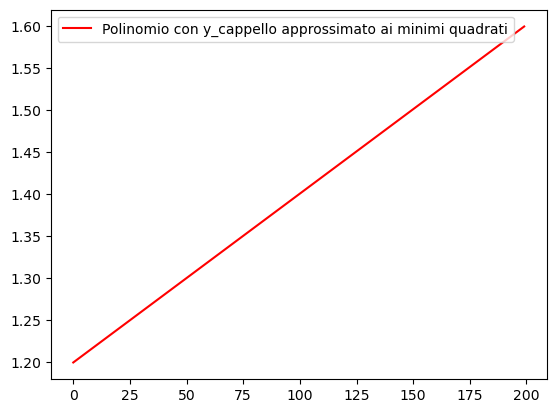

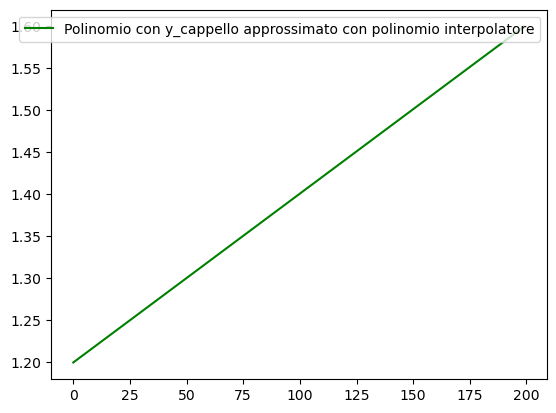

In [117]:
plt.plot(pol_quadr, 'r-')
plt.legend(['Polinomio con y_cappello approssimato ai minimi quadrati'])
plt.show()
plt.plot(pol_int, 'g-')
plt.legend(['Polinomio con y_cappello approssimato con polinomio interpolatore'])
plt.show()

5. Si fornisca una spiegazione teorica ai risultati ottenuti, utilizzando i teoremi visti a lezione.   **Punti: 4**

Si nota che, utilizzando le coordinate y_cappello, il polinomio di intrerpolazione diventa lineare

## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

Una rete neurale è costituita da strati di neuroni connessi tra loro. Un neurone artificiale, anche detto percettrone, riceve degli input d, ai quali è associato un peso w. Tra i pesi, si ricorda in particolare w0, il bias, il quale è un peso associato a un neurone fittizio e ha valore 1, poiché viene utilizzato per tarare il valore di lavoro ottimale del percettrone. Inoltre, ruolo chiave è quello svolto dalla funzione di attivazione, funzione non lineare e derivabile, la quale attiva il neurone solo se i valori in input superano una soglia determinata. 

Per fase di forward propagation, si intende il far scorrere tutti i dati attraverso la rete (e quindi attraverso gli strati), di cui viene calcolata la funzione di attivazione. 
Per fase di backward propagation, si intende il calcolo del gradiente della funzione di loss attraverso il metodo del gradiente rispetto a ciascun peso di ogni neurone, utilizzando la chain rule del calcolo differenziale 

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**

Metodo del gradiente batch: il calcolo della funzione costo passa per una fase di forward propagation dell'intero traing set, per poi passare a una fase di backward propagation per aggiornare i parametri. In questo modo, i dati sono aggiornati una sola volta.

Metodo stocastico del gradiente: si tratta di un algoritmo per minimizzare la funzione di costo di una rete neurale, migliorando i pesi in modo iterativo attraverso backpropagation.

Metodo del gradiente mini-batch: viene preso in considerazione un sottoinsieme del data set. Se la rete prevede n osservazioni, allora il mini-batch conterrà 1 < x < n osservazioni. Ogni osservazione indica il numero di campioni da far scorrere nella rete ad ogni iterazione.

 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**

 Al fine di non rimanere bloccati in un minimo locale, è necessario che la funzione di loss sia convessa, poiché ciò assicura che il punto di minimo trovato con il metodo del gradiente sia globale e non locale. Una funzione di loss è sicuramente convessa se non presenta hidden layer. 

 Metodo del gradiente con momentum: accelera la convergenza e migliora le oscillazioni. Ricordiamo che i pesi vengono così aggiornati: w(k+1) = wk + (learning rate) * vk, dove vk = Beta * v(k-1) + gradiente(loss function). Beta è detto momentum e ha valori tra 0 e 1, in particolare i valori ottimali sono tra 0.8 e 0.9. Vk indica la velocità accumulata rispetto al passo precedente, e serve per aumentare le dimensioni degli aggiornamenti quando i gradienti puntano nella stessa direzione o per diminuirle se puntano in direzioni diverse.

- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**

 Il valore di learning è un iperparametro fondamentale per l'addestramento di una rete neurale. Valori troppo alti fanno sì che non si converga alla soluzione, mentre valori troppo bassi fanno sì che si converga alla soluzione in un numero di iterazioni troppo elevato. Dunque, sarebbe necessario un learning rate dinamico, con valore medio-alto nella fase iniziale di ricerca, e valore basso nella fase finale. 
 1. step decay = il learning rate viene diminuito di un certo valore delta per ogni iterazione
 2. decadimento esponenziale = il learning rate viene diminuito in maniera esponenziale in base alle iterazioni: n = n * e**(-kt)
 3. decadimento dipendente dal tempo = il learning rate iniziale viene diviso in base al numero di iterazioni eseguite

 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
   1. Adagrad: adatta il learning rate eseguendo aggioramenti grandi ai parametri poco frequenti e viceversa. Questo fa sì che si abbia un accumulo di gradienti al quadrato che può portare a un learning rate molto basso.
   2. RMSProp: risolve il problema dell'adagrad, utilizzando una media ponderata esponenziale dei gradienti al quadrato.
   3. Adadelta: calcola l'accumulo come RMSProp, ma non imposta un learning rate iniziale, ma calibra l'aggiornamento in base alla quantità di cambiamento stessa
   4. Adam: utilizza RMSProp e il metodo del gradiente con momentum.